#### Nama : Gulfi Oktariani
#### NIM : 09011381823118
#### Ujian Akhir Semester Kecerdasan Buatan

#### Klasifikasi Nilai Ujian Mengunakan K-Nearest Neighbor
K-NN merupakan salah satu algoritma untuk klasifikasi data suatu objek berdasarkan sejumlah K-data training yang memiliki jarak paling dekat dengan objek tersebut. Jauh dekatknya tetangga, biasanya dihitung berdasarkan jarak Euclidean (d) sebagai berikut.
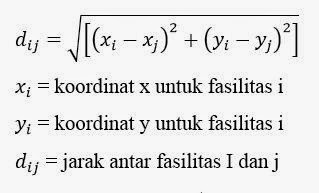

Langkah-Langkah Algoritma K-NN :
1. Menentukan parameter *K*, bilangan bulat positif sebagai nearest neighbors (banyaknya tetangga terdekat).
2. Hitung jarak antara data baru dan semua data yang ada di data training.
3. Menentukan *K* tetangga terdekat berdasarkan jarak minumum.
4. Tetangga yang memiliki frekuensi terbanyak diambil sebagai *nilai prediksi* atau *hasil klasifikasi* dari data baru.
Visualisasi Metode K-NN 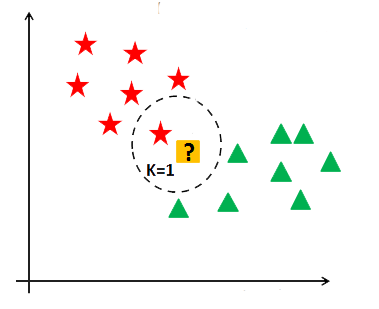

Refrensi data set : https://www.kaggle.com/spscientist/students-performance-in-exams

Dalam membuat sebuah model untuk melakukan klasifikasi data pelajar dalam ujian. Data ini mengguakan 2 jenis kelamin yaitu male dan female. Dataset yang digunakan berisi informasi nilai ujian pada mata pelajaran matematika, nilai menulis dan nilai membaca. Klasifikasi yang akan kita buat ini termasuk ke dalam jenis Binary Classification.

#### Tahapan Melakukan Klasifikasi 
1. Import Library yang diperlukan 
2. Membaca data dari file CSV.
3. Exploratory data analysis
    - Statistik deskriptif data.
    - Pair plot distribusi data.
4. Preprocessing
    - Memisahkan features dan label.
    - Membagi data latih dan uji.
    - Label encoding.
    - Standarisasi data.
    - Menentukan nilai k berdasarkan mean absolute error.
5. Training, menggunakan algoritma KNN.
6. Evaluasi, menggunakan accuracy score dan confusion matrix.

### 1. Import Library

In [1]:
# Memanggil pandas untuk manipulasi data
import pandas as pd
# memanggil numpy untuk mengolah data numerical
import numpy as np 
# Memanggil matplot untuk grafik
import matplotlib.pyplot as plt
# seaborn untuk memproduksi visualisasi dengan Python
import seaborn as sns
# LabelEncoder digunakan untuk merubah nama
from sklearn.preprocessing import LabelEncoder
# untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.
from sklearn.preprocessing import StandardScaler
# train_test_split untuk memudahkan proses pembagian data
from sklearn.model_selection import train_test_split
# Memanggil library sk learn untuk KNN Clasifier 
from sklearn.neighbors import KNeighborsClassifier 
# memberikan rincian setiap kelas (class-species) dengan precision, recall, f1-score dan support yang menunjukkan hasil yang sangat baik.
from sklearn.metrics import classification_report
# Memanggil confussion matrix untuk memperoleh hasil akurasi klasifikasi antara data uji dan data sebenarnya
from sklearn.metrics import confusion_matrix

### 2. Menampilkan Data

In [2]:
# Memanggil data students performance pada file csv
# Memasukkan ke dalam variabel sp
sp = pd.read_csv('StudentsPerformance.csv')

# melihat 5 baris pertama dari data set
sp.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Menghapus kolom yang tidak diperlukan
sp = sp.drop(['race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
sp.head(5)

,gender,math score,reading score,writing score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


### 3. Exploratory Data Analysis
Setelah memuat data yang akan diolah sebagai DataFrame, kemudian dapat mulai melakukan eksplorasi data. Proses eksplorasi data yang akan dilakukan yaitu menghitung statistika deskripsi data, melihat sampel data teratas, dan melakukan visualisasi sebaran data dan distribusinya.
#### Statistik Deskriptif Data

In [4]:
sp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Dapat dilihat pada output di atas masing-masing kelas terdapat 1000 data. Semua atribut memiliki mean dan standar deviasi yang berbeda-beda pula. Jika kita melihat pada min dan max, terlihat bahwa range antar atribut juga bervariasi.
Dikarenakan pada klasifikasi ini menggunakan model KNN, maka akan dilakukan proses standarisasi sebelum melakukan training, karena KNN menggunakan prinsip metrik jarak dengan Euclidean. Apabila terdapat data dengan range yang jauh, maka dengan melakukan standarisasi akan mempercepat proses training dan meningkatkan akurasi model.

#### Pair Plot 

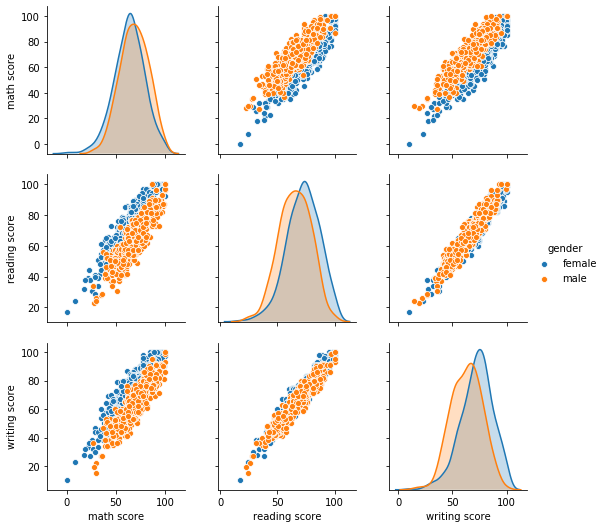

In [5]:
sns.pairplot(sp, hue='gender')

### 4. Preprocessing

##### Memisahkan Features dan Label
Pada tahap ini akan melakukan operasi slicing untuk membagi data dari dalam objek DataFrame. Pada tahap ini juga akan mengambil data sebagai array, bukan objek DataFrame. Hal ini dilakukan karena library scikit-learn menggunakan tipe data NumPy array untuk digunakan dalam algoritmanya.

In [6]:
X = sp.iloc[:, :-1].values
y = sp.iloc[:, 3].values

#### Membagi Data Latih dan Uji
Pada tahap ini akan membagi 1000 data untuk latih dan uji. Yang akan menggunakan fungsi train_test_split untuk memudahkan proses pembagian data agar data yang dibagi seimbang, untuk menghindari overfitting,kemudian dapat membagi dataset tadi menjadi data train dan test.  Untuk data set ini akan membagi data tersebut menjadi 80% untuk training data data dan 20% untuk test data.

In [7]:
# Pada kasus ini explanatory variablenya adalah 'math score','reading score','writing score' sedangkan target variablenya adalah gender
X = sp[['math score','reading score','writing score']]
y = sp['gender']


# kita akan mensplit menjadi 80% train data and 20% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### Hasil Telah di split 

In [8]:
# Chek dimensi array dari massing masing variable
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (800, 3)
X_test =  (200, 3)
y_train =  (800,)
y_test =  (200,)


Dimensi X_train menjadi 800 baris dan 3 kolom, dimensi X_test menjadi 200 baris dan 1 kolom, dimensi y_train menjadi 200 baris dan 1 kolom, dimensi y_train menjadi 200 baris dan 1 kolom. 

#### Label Encoding
Karena kelas dari dataset ini berupa teks, maka perlu dilakukan encoding. Pada kasus ini akan menggunakan label encoding, karena internal algoritma ini menggunakan ketetanggan, maka nilai output tidak akan terbiasa dari penggunaan teknik encoding ini.

In [9]:
lb = LabelEncoder()
lb.fit(y_train)
 
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

#### Standarisasi
Algoritma KNN menggunakan metrik jarak (Euclidean), sehingga memiliki data yang terdistribusi merata khususnya pada distribusi normal akan meningkatkan performa model KNN ini. Maka dari itu diperlukan proses standarisasi data.

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Menentukan Nilai Konstanta k
Seperti yang sudah di jelaskan sebelumnya, bahwa KNN membutuhkan suatu nilai konstanta  untuk menentukan berapa banyak tetangga yang akan digunakan oleh model. Kode di bawah ini akan melakukan training sebanyak 9 kali dengan nilai  dari 1 hingga 9. Angka 9 ini bersifat bebas dan dapat diganti dengan angka lain.

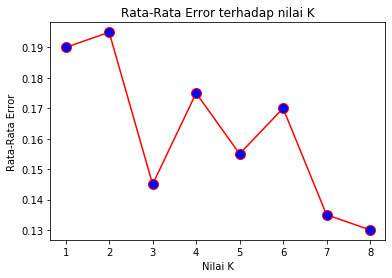

In [11]:
error = []
 
for i in range(1, 9):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
 
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
 
plt.figure()
plt.plot(range(1, 9), error, color='red', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

Dapat dilihat pada grafik yang dihasilkan, bahwa terdapat beberapa nilai  yang dapat meminimalisasi nilai error. Contohnya nilai  awal yang digunakan adalah 2, dapat dilihat pada grafik bahwa nilai  memiliki tingkat error sebesar 0,20. Ternyata nilai  yang besar seperti k 8 memiliki tingkat error yang kecil.

Setelah mengetahui nilai  dengan error yang rendah, maka dapat melatih kembali model dengan mengubah nilai  sesuai dengan grafik yang ada. Teknik ini merupakan salah satu teknik sederhana untuk menghasilkan model yang lebih baik. Terdapat banyak cara lain untuk meningkatkan akurasi dan performa suatu model.

### 5. Training
Pada proses training ini kamu akan menggunakan nilai konstanta k=8. jadi kita memprediksi berdasarkan jarak dari 7 titik terdekat. 

In [15]:
# Memanggil KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 8)

# Fitting model dengan training data dan target
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

merupakan hyperparameter yang bisa di tuning atau diubah nantinya

### 6. Evaluasi 
Setelah proses training, maka akan mengevaluasi apakah model yang telah dibuat memiliki akurasi yang baik atau belum.

In [16]:
y_prediksi =knn.predict(X_test)
# Mencetak classification_report dari y_test dan y_prediksi
print (classification_report (y_test, y_prediksi))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        97
           1       0.92      0.82      0.87       103

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



Berdasarkan hasil output dari classification_report, diketahui bahwa model masih terdapat kesalahan klasifikasi yang ditandai dengan precision dan recall yang tidak mencapai angka 1.

#### Confusion Matrix

Confusion matrix juga sering disebut error matrix. Pada dasarnya confusion matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem (model) dengan hasil klasifikasi sebenarnya. Confusion matrix berbentuk tabel matriks yang menggambarkan kinerja model klasifikasi pada serangkaian data uji yang nilai sebenarnya diketahui.
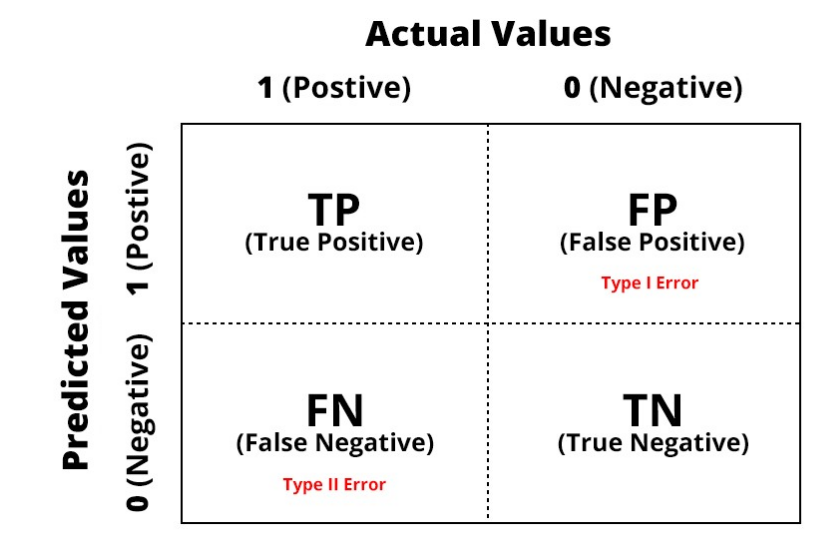
Terdapat 4 istilah sebagai representasi hasil proses klasifikasi pada confusion matrix. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). 
1. True Positive (TP)
Merupakan data positif yang diprediksi benar. 
2. True Negative (TN)
Merupakan data negatif yang diprediksi benar. 
3. False Postive (FP) — Type I Error
Merupakan data negatif namun diprediksi sebagai data positif. 
4. False Negative (FN) — Type II Error
Merupakan data positif namun diprediksi sebagai data negatif.

#### Persamaan Nilai Accuracy
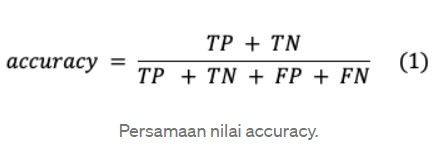

#### Persamaan Nilai Precious
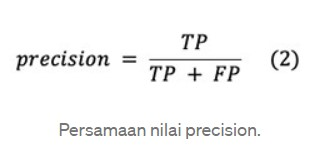

#### Persamaan Nilai Recall
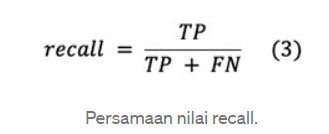

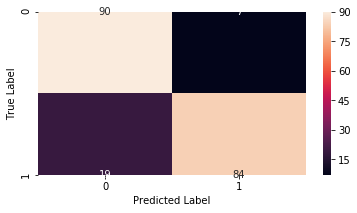

In [17]:
f, ax = plt.subplots(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test, y_prediksi), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hasil akurasi dari confusion matrix sebesar 87%, didapat dengan menghitung menggunakan rumus pada gambar "persamaan accuracy" sebelumnya.

#### Kesimpulan :
Model prediksi ini memiliki performa sebesar 87% merupakan nilai yang cukup besar dan menandakan keakuratan prediksi bisa dikatakan cukup baik, dengan menguji menggunakan nilai k= 1 sampai k=9 kemudian dipilih dari persentase eror yang terkecil yaitu menggunakan nilai k=8, dengan jumlah data training sebanyak 800 dan data testing sebanyak 200 pada data pelajar dalam ujian. 